In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

df = pd.read_excel("DATA- format.xlsx")
""""
### Simplifications for the sake of the tutorial ###
# Drop data before 2009 for the purpose of this tutorial
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]

"""
df.head()

,YEAR,DOY,HR,DATE (yyyy - d - hr),DATE (yyyy - m - d),Vector B Magnitude,Lat. Angle of B,Temperature,Proton Density,Plasma Speed,Plasma flow,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,R (Sunspot No.),Proton flux (>1 Mev)
0,2020.0,1.0,0.0,2020 - 1 - 0,2020-01-01,0.8,-13.7,22067.0,10.0,295.0,0.9,0.008,1.50,0.12,10.01,6.0,999999.99
1,2020.0,1.0,1.0,2020 - 1 - 1,2020-01-01,2.4,16.8,30130.0,7.8,299.0,1.6,0.014,1.23,-0.24,6.12,6.0,999999.99
2,2020.0,1.0,2.0,2020 - 1 - 2,2020-01-01,3.7,0.9,39156.0,8.3,300.0,-0.4,0.022,1.36,0.06,3.62,6.0,999999.99
3,2020.0,1.0,3.0,2020 - 1 - 3,2020-01-01,5.2,4.4,25524.0,5.5,298.0,-0.5,0.029,0.91,-0.03,1.25,6.0,999999.99
4,2020.0,1.0,4.0,2020 - 1 - 4,2020-01-01,4.0,26.3,30304.0,7.6,302.0,0.9,0.012,1.21,-0.51,2.59,6.0,999999.99


In [36]:
df = pd.read_excel("DATA.xlsx")
df.head()

,DATE,Vector B Magnitude,Lat. Angle of B,Temperature,Proton Density,Plasma Speed,Plasma flow,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,R (Sunspot No.),Proton flux (>1 Mev)
0,2020-01-01,0.8,-13.7,22067,10.0,295,0.9,0.008,1.50,0.12,10.01,6,999999.99
1,2020-01-01,2.4,16.8,30130,7.8,299,1.6,0.014,1.23,-0.24,6.12,6,999999.99
2,2020-01-01,3.7,0.9,39156,8.3,300,-0.4,0.022,1.36,0.06,3.62,6,999999.99
3,2020-01-01,5.2,4.4,25524,5.5,298,-0.5,0.029,0.91,-0.03,1.25,6,999999.99
4,2020-01-01,4.0,26.3,30304,7.6,302,0.9,0.012,1.21,-0.51,2.59,6,999999.99


In [37]:
df.head(15)

,DATE,Vector B Magnitude,Lat. Angle of B,Temperature,Proton Density,Plasma Speed,Plasma flow,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,R (Sunspot No.),Proton flux (>1 Mev)
0,2020-01-01,0.8,-13.7,22067,10.0,295,0.9,0.008,1.50,0.12,10.01,6,999999.99
1,2020-01-01,2.4,16.8,30130,7.8,299,1.6,0.014,1.23,-0.24,6.12,6,999999.99
2,2020-01-01,3.7,0.9,39156,8.3,300,-0.4,0.022,1.36,0.06,3.62,6,999999.99
3,2020-01-01,5.2,4.4,25524,5.5,298,-0.5,0.029,0.91,-0.03,1.25,6,999999.99
4,2020-01-01,4.0,26.3,30304,7.6,302,0.9,0.012,1.21,-0.51,2.59,6,999999.99
5,2020-01-01,3.9,7.7,35261,7.5,311,-1.0,0.013,1.27,-0.12,3.04,6,999999.99
6,2020-01-01,3.4,-31.2,30589,6.4,313,-1.1,0.015,1.11,0.56,2.40,6,999999.99
7,2020-01-01,4.1,-54.3,43851,8.5,326,0.4,0.015,1.60,1.04,3.29,6,999999.99
8,2020-01-01,3.9,-51.5,43397,8.0,330,-0.3,0.016,1.55,0.92,3.76,6,999999.99
9,2020-01-01,2.5,-40.4,44369,8.5,329,0.8,0.018,1.65,0.49,4.02,6,999999.99


In [38]:
from datetime import datetime, date 

df['DATE'] = pd.to_datetime(df.DATE, format ='%d/%m/%Y')
df.head().style.set_properties(subset=['DATE'], **{'background-color': 'dodgerblue'})

,DATE,Vector B Magnitude,Lat. Angle of B,Temperature,Proton Density,Plasma Speed,Plasma flow,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,R (Sunspot No.),Proton flux (>1 Mev)
0,2020-01-01 00:00:00,0.800000,-13.700000,22067,10.000000,295,0.900000,0.008000,1.500000,0.120000,10.010000,6,999999.990000
1,2020-01-01 00:00:00,2.400000,16.800000,30130,7.800000,299,1.600000,0.014000,1.230000,-0.240000,6.120000,6,999999.990000
2,2020-01-01 00:00:00,3.700000,0.900000,39156,8.300000,300,-0.400000,0.022000,1.360000,0.060000,3.620000,6,999999.990000
3,2020-01-01 00:00:00,5.200000,4.400000,25524,5.500000,298,-0.500000,0.029000,0.910000,-0.030000,1.250000,6,999999.990000
4,2020-01-01 00:00:00,4.000000,26.300000,30304,7.600000,302,0.900000,0.012000,1.210000,-0.510000,2.590000,6,999999.990000


In [39]:
df.shape

(3421, 13)

In [40]:
df.isnull().sum()

DATE                    0
Vector B Magnitude      0
Lat. Angle of B         0
Temperature             0
Proton Density          0
Plasma Speed            0
Plasma flow             0
Alpha/Prot. ratio       0
Flow pressure           0
E elecrtric field       0
Plasma Beta             0
R (Sunspot No.)         0
Proton flux (>1 Mev)    0
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
df.shape

(3421, 13)

In [43]:
df.columns

Index(['DATE', 'Vector B Magnitude', 'Lat. Angle of B', 'Temperature',
       'Proton Density', 'Plasma Speed', 'Plasma flow', 'Alpha/Prot. ratio',
       'Flow pressure', 'E elecrtric field', 'Plasma Beta', 'R (Sunspot No.)',
       'Proton flux (>1 Mev)'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 0 to 3420
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  3421 non-null   datetime64[ns]
 1   Vector B Magnitude    3421 non-null   float64       
 2   Lat. Angle of B       3421 non-null   object        
 3   Temperature           3421 non-null   int64         
 4   Proton Density        3421 non-null   float64       
 5   Plasma Speed          3421 non-null   int64         
 6   Plasma flow           3421 non-null   float64       
 7   Alpha/Prot. ratio     3421 non-null   float64       
 8   Flow pressure         3421 non-null   float64       
 9   E elecrtric field     3421 non-null   float64       
 10  Plasma Beta           3421 non-null   float64       
 11  R (Sunspot No.)       3421 non-null   int64         
 12  Proton flux (>1 Mev)  3421 non-null   float64       
dtypes: datetime64[ns](

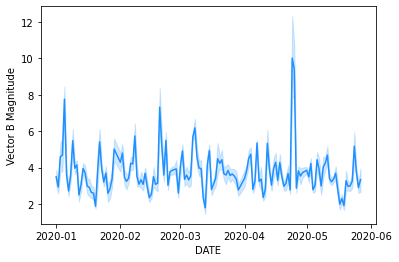

In [45]:
#f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 25))
figsize=(10, 14)
sns.lineplot(x=df.DATE, y=df["Vector B Magnitude"], color='dodgerblue')
#set_title('Feature: Vector B Magnitude', fontsize=5)
#set_ylabel(ylabel='Vector B Magnitude', fontsize=15)
'''

sns.lineplot(x=df.DATE, y=df["Lat. Angle of B"], ax=ax[1], color='dodgerblue',label='Bastia Umbra')
ax[1].set_title('Feature:Lat. Angle of B', fontsize=5)
ax[1].set_ylabel(ylabel='Lat. Angle of B', fontsize=5)


sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: Volume', fontsize=14)
ax[2].set_ylabel(ylabel='Volume', fontsize=14)


sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: Hydrometry', fontsize=14)
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)


sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: Depth to Groundwater', fontsize=14)
ax[4].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)


for i in range(5):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
'''
#ax[1].set_xlim([date(2020, 1, 1), date(2020, 6, 30)])
plt.show()

<AxesSubplot:xlabel='DATE', ylabel='Temperature'>

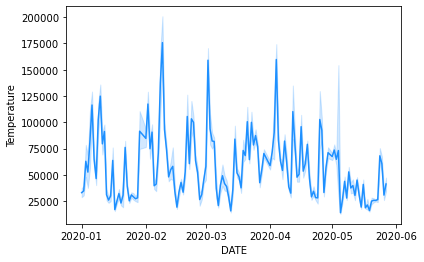

In [46]:
figsize=(10, 14)
sns.lineplot(x=df.DATE, y=df["Temperature"], color='dodgerblue')

<AxesSubplot:xlabel='DATE', ylabel='Proton Density'>

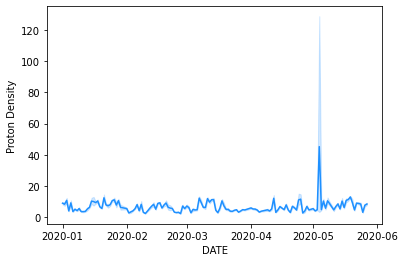

In [47]:
figsize=(10, 14)
sns.lineplot(x=df.DATE, y=df["Proton Density"], color='dodgerblue')

<AxesSubplot:xlabel='DATE', ylabel='Plasma Speed'>

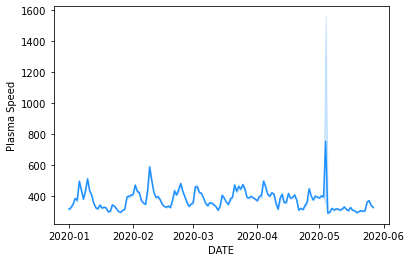

In [48]:
figsize=(10, 14)
sns.lineplot(x=df.DATE, y=df["Plasma Speed"], color='dodgerblue')

<AxesSubplot:xlabel='DATE', ylabel='Plasma flow'>

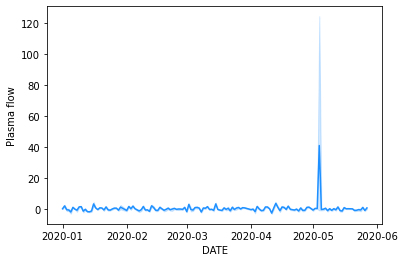

In [49]:
figsize=(10, 14)
sns.lineplot(x=df.DATE, y=df["Plasma flow"], color='dodgerblue')

<AxesSubplot:xlabel='DATE', ylabel='E elecrtric field'>

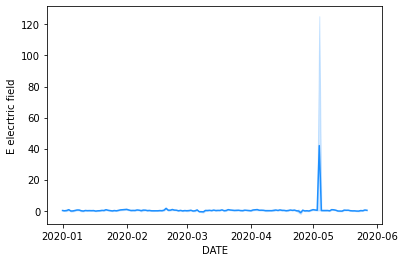

In [50]:
figsize=(10, 14)
sns.lineplot(x=df.DATE, y=df["E elecrtric field"], color='dodgerblue')

<AxesSubplot:xlabel='DATE', ylabel='Plasma Beta'>

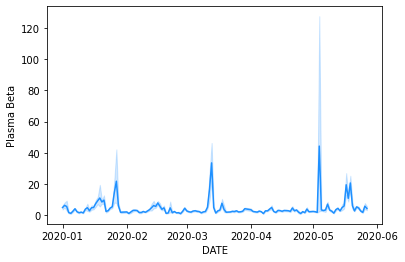

In [51]:
figsize=(10, 14)
sns.lineplot(x=df.DATE, y=df["Plasma Beta"], color='dodgerblue')

<AxesSubplot:xlabel='DATE', ylabel='R (Sunspot No.)'>

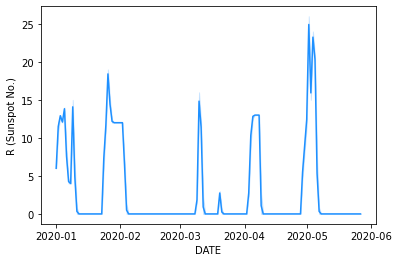

In [69]:
figsize=(20, 14)
sns.lineplot(x=df.DATE, y=df["R (Sunspot No.)"], color='dodgerblue')

<AxesSubplot:xlabel='DATE', ylabel='Proton flux (>1 Mev)'>

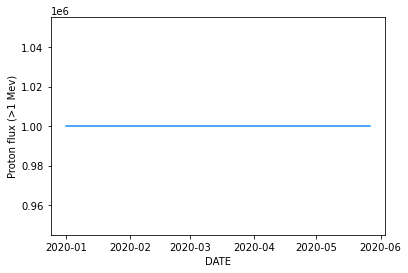

In [53]:
figsize=(10, 14)
sns.lineplot(x=df.DATE, y=df["Proton flux (>1 Mev)"], color='dodgerblue')

In [57]:
from sklearn.preprocessing import StandardScaler
Scale=StandardScaler()
def data_prep(df, lookback, future, Scale):
    date_train=pd.to_datetime(df['DATE'])
    df_train=df[['Vector B Magnitude', 'Temperature',
       'Proton Density', 'Plasma Speed', 'Plasma flow', 'Alpha/Prot. ratio',
       'Flow pressure', 'E elecrtric field', 'Plasma Beta', 'R (Sunspot No.)',
       'Proton flux (>1 Mev)']]
    df_train=df_train.astype(float)
    
    df_train_scaled=Scale.fit_transform(df_train)

    X, y =[],[]
    for i in range(lookback, len(df_train_scaled)-future+1):
        X.append(df_train_scaled[i-lookback:i, 0:df_train.shape[1]])
        y.append(df_train_scaled[i+future-1:i+future, 0])
        
    return np.array(X), np.array(y), df_train, date_train

Lstm_x, Lstm_y, df_train, date_train = data_prep(df, 30, 1, Scale)

In [54]:
df.head()

,DATE,Vector B Magnitude,Lat. Angle of B,Temperature,Proton Density,Plasma Speed,Plasma flow,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,R (Sunspot No.),Proton flux (>1 Mev)
0,2020-01-01,0.8,-13.7,22067,10.0,295,0.9,0.008,1.50,0.12,10.01,6,999999.99
1,2020-01-01,2.4,16.8,30130,7.8,299,1.6,0.014,1.23,-0.24,6.12,6,999999.99
2,2020-01-01,3.7,0.9,39156,8.3,300,-0.4,0.022,1.36,0.06,3.62,6,999999.99
3,2020-01-01,5.2,4.4,25524,5.5,298,-0.5,0.029,0.91,-0.03,1.25,6,999999.99
4,2020-01-01,4.0,26.3,30304,7.6,302,0.9,0.012,1.21,-0.51,2.59,6,999999.99


In [56]:
df.columns

Index(['DATE', 'Vector B Magnitude', 'Lat. Angle of B', 'Temperature',
       'Proton Density', 'Plasma Speed', 'Plasma flow', 'Alpha/Prot. ratio',
       'Flow pressure', 'E elecrtric field', 'Plasma Beta', 'R (Sunspot No.)',
       'Proton flux (>1 Mev)'],
      dtype='object')

In [62]:
def Lstm_fallback(X,y):
    model = Sequential()
    
    model.add(LSTM(64, activation='relu',input_shape=(X.shape[1], X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y.shape[1], activation='relu'))

    opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)  
    model.compile(
            loss='mse',
            optimizer=opt,
        )
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y, epochs=100, verbose=1, callbacks=[es], validation_split=0.1, batch_size=16)
    return model

In [59]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
!pip install yfinance 
import yfinance as yf

In [63]:
def Lstm_model1(X, y):
    regressor = Sequential()

    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
    return regressor

In [64]:
def Lstm_model2(X,y):
    model=Sequential()
    
    model.add(LSTM(20,return_sequences=True,input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #model.add(LSTM(15,return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(15))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    
    adam = optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',optimizer=adam)
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y,validation_split=0.2,epochs=100,batch_size=64,verbose=1, callbacks=[es])
    return model

In [65]:
def predict_open(model,date_train,Lstm_x,df_train, future, Scale):
    forecasting_dates=pd.date_range(list(date_train)[-1], periods=future, freq='1d').tolist()
    predicted=model.predict(Lstm_x[-future:])
    predicted1=np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled=Scale.inverse_transform(predicted1)[:,0]
    return predicted_descaled,forecasting_dates

def output_prep(forecasting_dates,predicted_descaled):
    dates=[]
    for i in forecasting_dates:
        dates.append(i.date())
    df_final=pd.DataFrame(columns=['Date','Open'])
    df_final['Date']=pd.to_datetime(dates)
    df_final['Open']=predicted_descaled
    return df_final

In [66]:
def results(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model1(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

In [67]:
def results1(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model2(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

Epoch 1/100
48/48 [==============================] - 14s 111ms/step - loss: 0.7781 - val_loss: 0.4867
Epoch 2/100
48/48 [==============================] - 3s 69ms/step - loss: 0.6160 - val_loss: 0.4076
Epoch 3/100
48/48 [==============================] - 3s 69ms/step - loss: 0.5429 - val_loss: 0.3711
Epoch 4/100
48/48 [==============================] - 3s 71ms/step - loss: 0.5009 - val_loss: 0.3397
Epoch 5/100
48/48 [==============================] - 3s 70ms/step - loss: 0.4780 - val_loss: 0.3510
Epoch 6/100
48/48 [==============================] - 3s 69ms/step - loss: 0.4580 - val_loss: 0.3280
Epoch 7/100
48/48 [==============================] - 3s 68ms/step - loss: 0.4420 - val_loss: 0.2983
Epoch 8/100
48/48 [==============================] - 3s 67ms/step - loss: 0.4240 - val_loss: 0.3238
Epoch 9/100
48/48 [==============================] - 3s 67ms/step - loss: 0.4107 - val_loss: 0.3139
Epoch 10/100
48/48 [==============================] - 3s 66ms/step - loss: 0.3933 - val_loss: 0.31

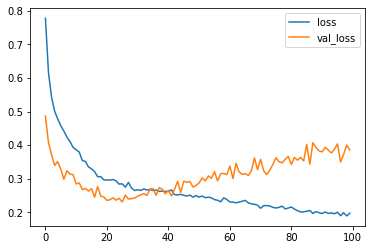

NameError: name 'px' is not defined

In [68]:
results(df, 30, 1, Scale, 'NSEBANK')